In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Данные

In [2]:
digits_dataset = load_digits() # digits_dataset – словарь

In [3]:
digits_dataset.keys() # нас интересует data, target, target_names и images

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# метки классов совпадают с названиями классов
np.unique(digits_dataset["target"]), digits_dataset["target_names"] 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [5]:
digits_dataset["images"].shape # 1797 изображения размера 8x8

(1797, 8, 8)

In [6]:
digits_dataset["data"].shape # 1797 объектов с 64 признаками

(1797, 64)

In [7]:
digits_dataset["data"][:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [8]:
digits_dataset["target"][:3]

array([0, 1, 2])

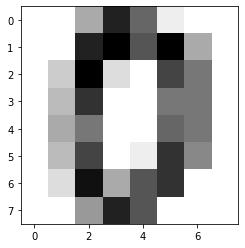

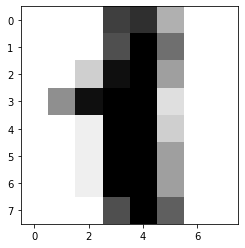

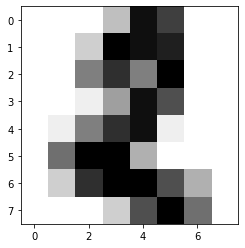

In [9]:
# визуализируем изображения

for image in digits_dataset["images"][:3]:
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

# Обучение

In [10]:
# для решения задачи классификации нам достаточно вытянуть вытянуть изображения в вектор
# это уже сделано в data
X, y = digits_dataset["data"], digits_dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [12]:
knn_classifier = KNeighborsClassifier(algorithm="brute") # создаем классификатор

In [13]:
knn_classifier.fit(X_train, y_train) # обучаем классификатор

KNeighborsClassifier(algorithm='brute')

# Оценка качества

In [14]:
y_pred = knn_classifier.predict(X_test) # делаем предсказание на тестовой выборке

In [15]:
print(metrics.classification_report(y_test, y_pred)) # оцениваем качество классификации на тестовой выборке

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.97      1.00      0.98        89
           2       1.00      1.00      1.00        83
           3       0.99      0.95      0.97        93
           4       0.99      1.00      0.99        93
           5       0.98      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.95      1.00      0.97        87
           8       0.95      0.94      0.95        83
           9       0.96      0.93      0.95        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



- Support – количество объектов, исходя из истинной разметки

- Макро-усреднение – считаем метрику для каждого класса, а потом усредняем

- Взвешенное усреднение – усредняем метрику среди всех классов с весами, равными количеству объектов класса.

- Accuracy – доля правильно предсказанных объектов

На конкретном примере (специально ухудшим классификатор, чтобы числа были нагляднее):

In [16]:
knn_classifier = KNeighborsClassifier(algorithm="brute", n_neighbors=598) # ухудшаем классификатор

knn_classifier.fit(X_train, y_train) # обучаем классификатор

y_pred = knn_classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        82
           1       0.63      0.13      0.22        89
           2       0.72      0.71      0.72        83
           3       0.60      0.69      0.64        93
           4       0.70      0.17      0.28        93
           5       1.00      0.10      0.18        99
           6       1.00      0.03      0.06        98
           7       0.76      0.79      0.78        87
           8       0.35      0.60      0.44        83
           9       0.88      0.08      0.14        92

    accuracy                           0.41       899
   macro avg       0.68      0.43      0.38       899
weighted avg       0.70      0.41      0.37       899



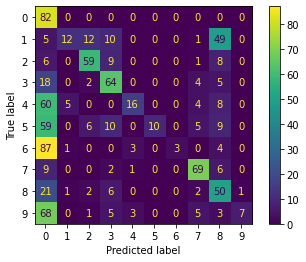

In [17]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # матрица ошибок
plt.show()

In [18]:
report = metrics.classification_report(y_test, y_pred, output_dict=True)

report

{'0': {'precision': 0.19759036144578312,
  'recall': 1.0,
  'f1-score': 0.3299798792756539,
  'support': 82.0},
 '1': {'precision': 0.631578947368421,
  'recall': 0.1348314606741573,
  'f1-score': 0.2222222222222222,
  'support': 89.0},
 '2': {'precision': 0.7195121951219512,
  'recall': 0.7108433734939759,
  'f1-score': 0.7151515151515151,
  'support': 83.0},
 '3': {'precision': 0.6037735849056604,
  'recall': 0.6881720430107527,
  'f1-score': 0.64321608040201,
  'support': 93.0},
 '4': {'precision': 0.6956521739130435,
  'recall': 0.17204301075268819,
  'f1-score': 0.27586206896551724,
  'support': 93.0},
 '5': {'precision': 1.0,
  'recall': 0.10101010101010101,
  'f1-score': 0.1834862385321101,
  'support': 99.0},
 '6': {'precision': 1.0,
  'recall': 0.030612244897959183,
  'f1-score': 0.05940594059405941,
  'support': 98.0},
 '7': {'precision': 0.7582417582417582,
  'recall': 0.7931034482758621,
  'f1-score': 0.7752808988764045,
  'support': 87.0},
 '8': {'precision': 0.35211267605

In [19]:
np.mean([report[str(label)]["f1-score"] for label in range(10)]) # макро-усреднение F1

0.3789049288463937

In [20]:
nom = sum([report[str(label)]["f1-score"] * report[str(label)]["support"] for label in range(10)])
denom = sum([report[str(label)]["support"] for label in range(10)])

nom / denom # взвешенное усреднение F1

0.37027054328272524

# Подбор гиперпараметров

In [21]:
import warnings
warnings.filterwarnings('ignore') 
# knn будет предупреждать нас, что при p < 1 расстояние Минковского теряет некоторые свойства
# игнорируем этот warning

param_grid = {"n_neighbors": [1, 2, 3, 5, 7, 10, 20, 50, 100], 
              "weights": ["uniform", "distance"], 
              "p": [0, 0.1, 0.5, 1, 2, 10, 100]}

knn = KNeighborsClassifier(algorithm="brute")

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, y_train)

print("Наилучшее качество: " + str(knn_cv.best_score_))
print("Наилучшие гиперпараметры: " + str(knn_cv.best_params_))

Наилучшее качество: 0.9799441340782122
Наилучшие гиперпараметры: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


- GridSearch – полный перебор, в реальных задачах слишком долго
- Brute алгоритм – неэффективный полный перебор при поиске ближайших соседей

# Оцениваем итоговое качество

In [22]:
knn_classifier = KNeighborsClassifier(
    algorithm="brute", 
    n_neighbors=1, 
    p=2, 
    weights="uniform")

knn_classifier.fit(X_train, y_train)

print(metrics.classification_report(y_test, knn_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        89
           2       1.00      0.99      0.99        83
           3       0.98      0.97      0.97        93
           4       0.99      0.99      0.99        93
           5       1.00      0.98      0.99        99
           6       1.00      1.00      1.00        98
           7       0.98      0.99      0.98        87
           8       0.96      0.96      0.96        83
           9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

